# Day 08. Exercise 01
# Binary classifier. SVM. Decision tree

## 0. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree

## 1. Preprocessing and logreg visualization

Read the file `am_pm.csv` to a dataframe from the previous exercise.

1. Draw a plot where the x-axis is `am`, the y-axis is `pm`, dots are the days, color depends on the target.
2. Add the decision boundary of logistic regression to the plot.
3. Draw the same plot (with the boundary), but the color should depend this time on the predictions.

Now it should be clear for you how the logistic regression works.

In [2]:
df = pd.read_csv('../dataset/am_pm.csv')
df.head()

,date,am,pm,target,predict
0,2020-04-17,21,2,working_day,weekend
1,2020-04-18,1,68,weekend,working_day
2,2020-04-19,18,15,weekend,working_day
3,2020-04-20,2,23,working_day,working_day
4,2020-04-21,0,25,working_day,working_day


In [34]:
#признаки для анализа - X, целевой признау у
X = df[['am', 'pm']].values
y = df['target']

lr = LogisticRegression(random_state=21, fit_intercept=False)

lr.fit(X=X, y=y)
print(lr.intercept_)
lr.coef_[0]

[0.]


array([-0.00038653,  0.00298066])

<h2> Эта модель решает уравнение y=a*x+b</h2>

Где a, это Коэффициент наклона линии:

In [35]:
a = -lr.coef_[0][0] / lr.coef_[0][1]
a

0.1296783107235358

Сдвиг линии (b):

In [36]:
b = -lr.intercept_[0] / lr.coef_[0][1]
b

-0.0

Построение линии границы решений
Для того чтобы построить линию, нужно определить диапазон значений по оси X и соответствующие им значения по оси Y.

In [37]:
#Функция np.linspace создает линейный массив чисел от минимального до максимального значения признака 'am'. 
# Это позволяет нам создать равномерную сетку точек вдоль оси X.
#Диапозон значений по оси Х
xx = np.linspace(min(df['am']), max(df['am']))
#Диапозон значений по оси Y
yy = a * xx + b

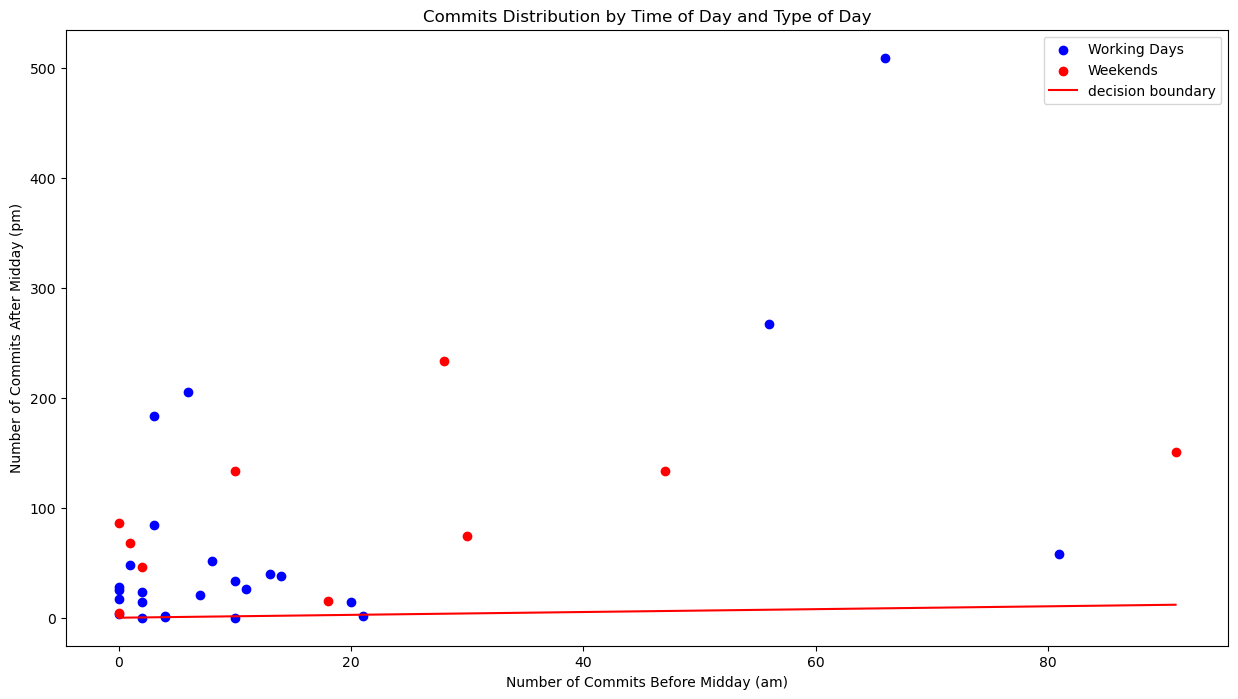

In [38]:
fig, ax = plt.subplots(figsize=(15, 8))
# Разделение данных на выходные и рабочие дни
working_days = df.query("target == 'working_day'")
weekends = df.query("target == 'weekend'")

# Отображение рабочих дней синими точками
ax.scatter(working_days['am'], working_days['pm'], color='blue', label='Working Days')

# Отображение выходных дней красными точками
ax.scatter(weekends['am'], weekends['pm'], color='red', label='Weekends')

ax.plot(xx, yy, label='decision boundary', color='red') # строим линию
# Настройка осей и легенды
ax.set_xlabel('Number of Commits Before Midday (am)')
ax.set_ylabel('Number of Commits After Midday (pm)')
ax.legend()

plt.title('Commits Distribution by Time of Day and Type of Day')
plt.show()

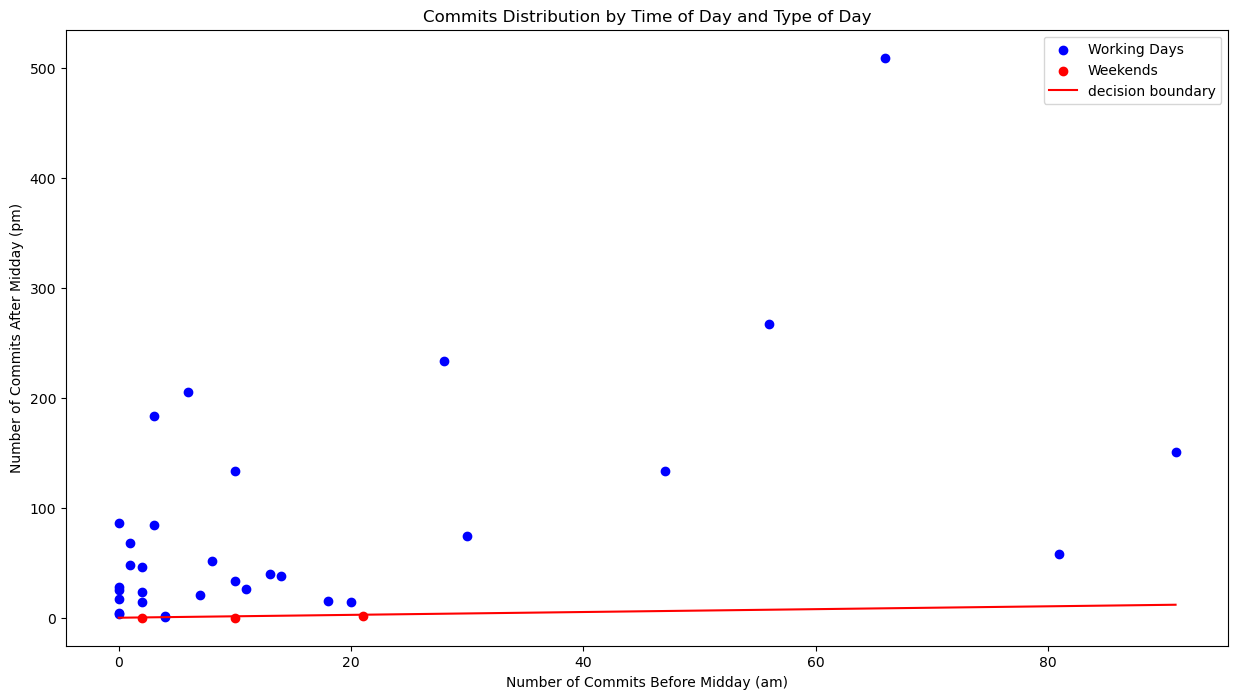

In [39]:
fig, ax = plt.subplots(figsize=(15, 8))
# Разделение данных на выходные и рабочие дни
working_days = df.query("predict == 'working_day'")
weekends = df.query("predict == 'weekend'")

# Отображение рабочих дней синими точками
ax.scatter(working_days['am'], working_days['pm'], color='blue', label='Working Days')

# Отображение выходных дней красными точками
ax.scatter(weekends['am'], weekends['pm'], color='red', label='Weekends')

ax.plot(xx, yy, label='decision boundary', color='red') # строим линию
# Настройка осей и легенды
ax.set_xlabel('Number of Commits Before Midday (am)')
ax.set_ylabel('Number of Commits After Midday (pm)')
ax.legend()

plt.title('Commits Distribution by Time of Day and Type of Day')
plt.show()

## 2. Standardizing and logreg

Linear models can be sensitive to the scale of your variables. You make it easier for them to find the optimal solution when you scale your features.

1. Apply `StandardScaler` to `X` and train logistic regression again with the same parameters.
2. Calculate `accuracy` for the new model. Did it get better than a naive classifier with the most popular class?
3. Draw the plots that were described above but for the new model.

In [9]:
scaler = StandardScaler()
X = df[['am', 'pm']]
df_scaler = df.copy()
df_scaler[['am','pm']] = scaler.fit_transform(X)
df_scaler.head()

,date,am,pm,target,predict
0,2020-04-17,0.200690,-0.719904,working_day,weekend
1,2020-04-18,-0.655914,-0.071822,weekend,working_day
2,2020-04-19,0.072199,-0.592251,weekend,working_day
3,2020-04-20,-0.613084,-0.513696,working_day,working_day
4,2020-04-21,-0.698744,-0.494057,working_day,working_day


In [10]:
X = df_scaler[['am', 'pm']].values
y = df_scaler['target']

lr = LogisticRegression(random_state=21, fit_intercept=False)

lr.fit(X=X, y=y)
pred = lr.predict(X)
df_scaler['predict'] = pred
df_scaler.head()

,date,am,pm,target,predict
0,2020-04-17,0.200690,-0.719904,working_day,working_day
1,2020-04-18,-0.655914,-0.071822,weekend,working_day
2,2020-04-19,0.072199,-0.592251,weekend,working_day
3,2020-04-20,-0.613084,-0.513696,working_day,working_day
4,2020-04-21,-0.698744,-0.494057,working_day,working_day


In [11]:
accuracy = accuracy_score(y, pred)
accuracy

0.7428571428571429

In [12]:
naive_accuracy = accuracy_score(y, [df_scaler['target'].mode().values] * len(y))
naive_accuracy

0.7142857142857143

In [13]:
if accuracy > naive_accuracy:
    print('yes, it is good')
else:
    print('no, it is not good')

yes, it is good


In [14]:
a = -lr.coef_[0][0] / lr.coef_[0][1]
b = -lr.intercept_[0] / lr.coef_[0][1]
#Функция np.linspace создает линейный массив чисел от минимального до максимального значения признака 'am'. 
# Это позволяет нам создать равномерную сетку точек вдоль оси X.
#Диапозон значений по оси Х
xx = np.linspace(min(df_scaler['am']), max(df_scaler['am']))
#Диапозон значений по оси Y
yy = a * xx + b

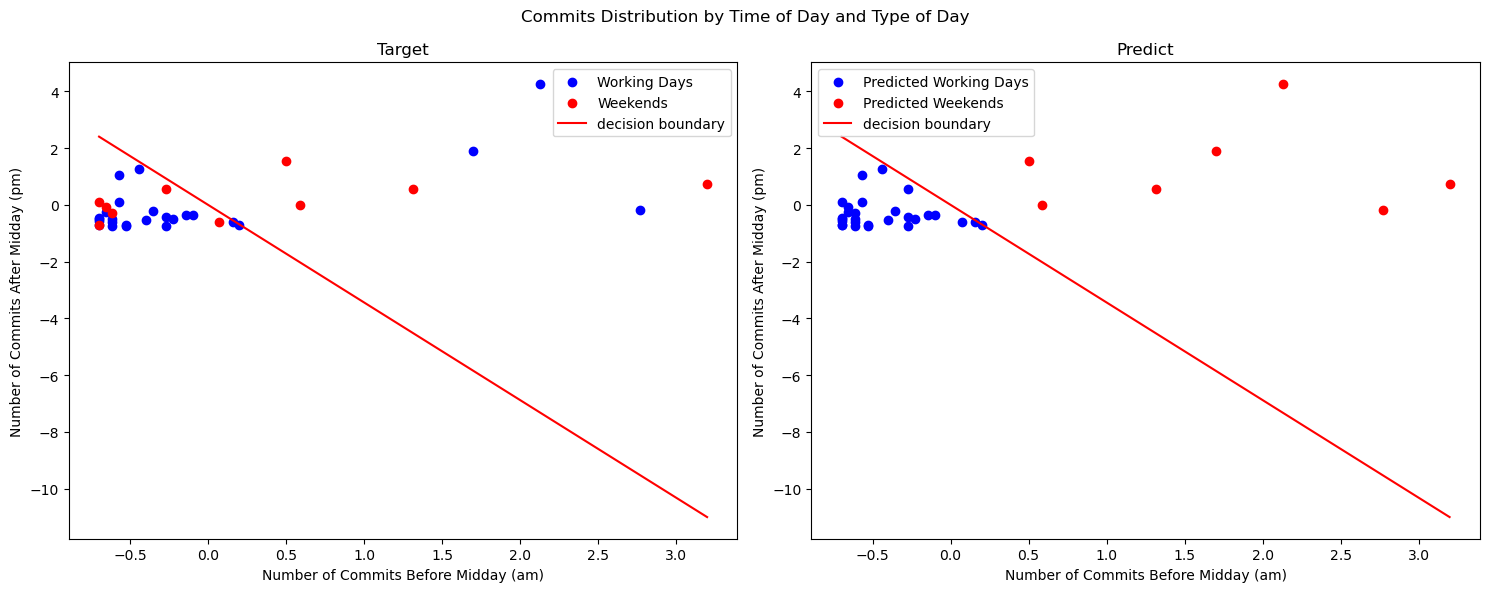

In [15]:
# Создаем фигуру и четыре оси
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 6))

# Первый график: разделение данных по реальному target
working_days = df_scaler.query("target == 'working_day'")
weekends = df_scaler.query("target == 'weekend'")

ax1.scatter(working_days['am'], working_days['pm'], color='blue', label='Working Days')
ax1.scatter(weekends['am'], weekends['pm'], color='red', label='Weekends')

ax1.plot(xx, yy, label='decision boundary', color='red') # строим линию

ax1.set_xlabel('Number of Commits Before Midday (am)')
ax1.set_ylabel('Number of Commits After Midday (pm)')
ax1.legend()
ax1.set_title('Target')

# Второй график: разделение данных по предсказанному predict
predicted_working_days = df_scaler.query("predict == 'working_day'")
predicted_weekends = df_scaler.query("predict == 'weekend'")

ax2.scatter(predicted_working_days['am'], predicted_working_days['pm'], color='blue', label='Predicted Working Days')
ax2.scatter(predicted_weekends['am'], predicted_weekends['pm'], color='red', label='Predicted Weekends')

ax2.plot(xx, yy, label='decision boundary', color='red') # строим линию

ax2.set_xlabel('Number of Commits Before Midday (am)')
ax2.set_ylabel('Number of Commits After Midday (pm)')
ax2.legend()
ax2.set_title('Predict')

plt.suptitle('Commits Distribution by Time of Day and Type of Day')
plt.tight_layout()
plt.show()

## 3. SVM

1. Apply `SVC` model to the scaled dataframe using parameters `probability=True`, `random_state=21`.
2. Calculate `accuracy`.
3. Try different kernels, find the best in terms of accuracy.
4. Draw both plots again with the decisions boundary to see how this algorithm works.

SVC (Support Vector Classifier) – это модель машинного обучения, используемая для классификации данных. Она основана на методе опорных векторов (support vector machines, SVM). Основная идея заключается в нахождении оптимальной гиперплоскости, которая разделяет классы данных так, чтобы минимизировать количество ошибок.

Основные характеристики SVC:

- Высокая точность: SVC часто демонстрирует высокую точность на задачах классификации, особенно когда данные хорошо разделяются.
- Устойчивость к шумам: Модель устойчива к шумам и аномальным значениям благодаря использованию мягкого метода классификации.
- Гибкость: Поддерживает различные типы ядер (kernels), что позволяет адаптировать модель под конкретные задачи.
- Алгоритмы оптимизации: В основе SVC лежит сложный метод оптимизации, который пытается найти оптимальную границу разделения классов.

Пример использования SVC может включать классификацию текстов на категории, распознавание изображений, медицинская диагностика и многие другие задачи, где требуется четко разделить несколько классов данных.

In [16]:
svc = SVC(probability=True, random_state=21)
df_svc = df.drop(columns='predict')
df_svc[['am', 'pm']] = scaler.fit_transform(X)

Для того чтобы определить какое ядро лучше использовать, воспользуемся методом GridSearchCV

In [17]:
X = df_svc[['am', 'pm']].values
y = df_svc['target']
param_grid = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
cv = GridSearchCV(svc, param_grid, scoring='accuracy')
cv.fit(X, y)
cv.best_params_

{'kernel': 'poly'}

In [18]:
svc_linear = SVC(kernel='linear', probability=True, random_state=21)
svc_linear.fit(X=X, y=y)
pred_linear = svc_linear.predict(X)
df_svc['predict_linear'] = pred_linear
accuracy = accuracy_score(y, pred_linear)
accuracy

0.7142857142857143

In [19]:
svc_poly = SVC(kernel='poly', probability=True, random_state=21)
svc_poly.fit(X=X, y=y)
pred_poly = svc_poly.predict(X)
df_svc['predict_poly'] = pred_poly
accuracy = accuracy_score(y, pred_poly)
accuracy

0.7428571428571429

In [20]:
svc_rbf = SVC(kernel='rbf', probability=True, random_state=21)
svc_rbf.fit(X=X, y=y)
pred_rbf = svc_rbf.predict(X)
df_svc['predict_rbf'] = pred_rbf
accuracy = accuracy_score(y, pred_rbf)
accuracy

0.7428571428571429

In [21]:
svc_sigmoid = SVC(kernel='sigmoid', probability=True, random_state=21)
svc_sigmoid.fit(X=X, y=y)
pred_sigmoid = svc_sigmoid.predict(X)
df_svc['predict_rbf'] = pred_sigmoid
accuracy = accuracy_score(y, pred_sigmoid)
accuracy

0.6857142857142857

In [22]:
df_svc.head()

,date,am,pm,target,predict_linear,predict_poly,predict_rbf
0,2020-04-17,0.200690,-0.719904,working_day,working_day,working_day,working_day
1,2020-04-18,-0.655914,-0.071822,weekend,working_day,working_day,working_day
2,2020-04-19,0.072199,-0.592251,weekend,working_day,working_day,working_day
3,2020-04-20,-0.613084,-0.513696,working_day,working_day,working_day,working_day
4,2020-04-21,-0.698744,-0.494057,working_day,working_day,working_day,working_day


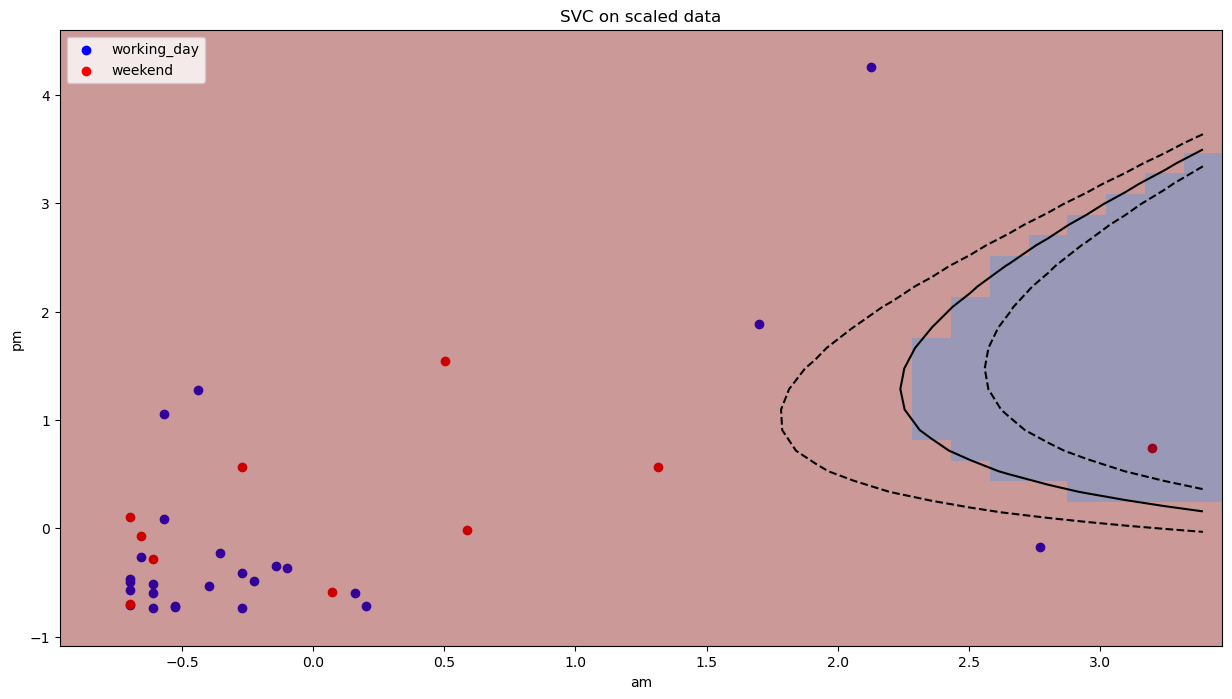

In [23]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x=df_svc.loc[df_svc['target'] == 'working_day']['am'],
           y=df_svc.loc[df_svc['target'] == 'working_day']['pm'],
           color='blue', label='working_day')
ax.scatter(x=df_svc.loc[df_svc['target'] == 'weekend']['am'],
           y=df_svc.loc[df_svc['target'] == 'weekend']['pm'],
           color='red', label='weekend')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = cv.decision_function(xy).reshape(XX.shape)
ax.pcolormesh(XX, YY, Z > 0, alpha=0.4, cmap='seismic')
ax.contour(XX, YY, Z, colors='k', levels=[-0.5, 0, 0.5],
           linestyles=['--', '-', '--'])
ax.set_title('SVC on scaled data')
ax.set_xlabel('am')
ax.set_ylabel('pm')
ax.legend(loc='upper left')
plt.show()

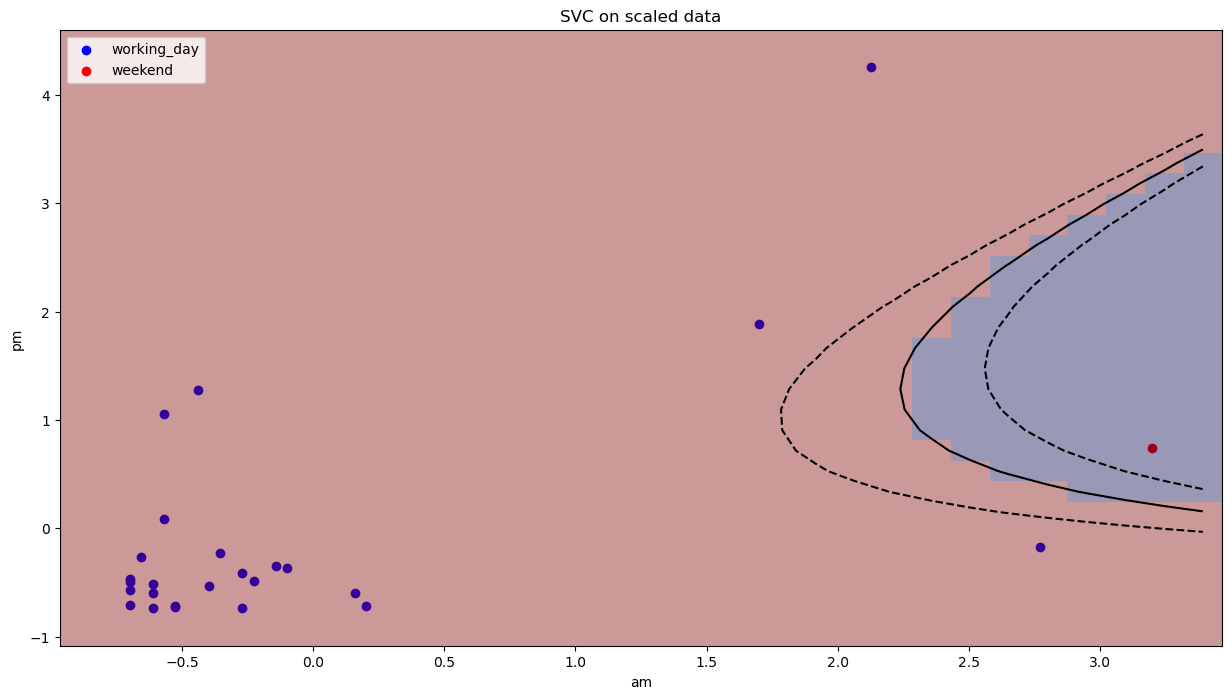

In [24]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x=df_svc.loc[df_svc['target'] == 'working_day']['am'],
           y=df_svc.loc[df_svc['target'] == 'working_day']['pm'],
           color='blue', label='working_day')
ax.scatter(x=df_svc.loc[df_svc['predict_poly'] == 'weekend']['am'],
           y=df_svc.loc[df_svc['predict_poly'] == 'weekend']['pm'],
           color='red', label='weekend')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = cv.decision_function(xy).reshape(XX.shape)
ax.pcolormesh(XX, YY, Z > 0, alpha=0.4, cmap='seismic')
ax.contour(XX, YY, Z, colors='k', levels=[-0.5, 0, 0.5],
           linestyles=['--', '-', '--'])
ax.set_title('SVC on scaled data')
ax.set_xlabel('am')
ax.set_ylabel('pm')
ax.legend(loc='upper left')
plt.show()

## 4. Decision tree

1. Apply `DecisionTreeClassifier` to the scaled dataframe using parameters `max_depth=4`, `random_state=42`.
2. Calculate accuracy.
3. Try different values of `max_depth`.
4. Draw both plots again with the decisions boundary to see how this algorithm works.
5. Using method `.plot_tree()` visualize the decision tree itself. It is another way of thinking about how the algorithm works.
6. How many leaves in the visualized tree label days as working days? Put your answer in the markdown cell in the end of the section.

DecisionTreeClassifier - это алгоритм машинного обучения, который используется для построения модели дерева решений. Эта модель представляет собой древовидную структуру, в которой каждый узел соответствует определенному решению или вопросу, а конечные вершины представляют собой результаты этих решений. Алгоритм DecisionTreeClassifier применяется для классификации данных, то есть определения принадлежности объекта к одному из заранее определенных классов.

In [25]:
df_dtc = df.drop(columns=['predict'])
df_dtc.head()

,date,am,pm,target
0,2020-04-17,21,2,working_day
1,2020-04-18,1,68,weekend
2,2020-04-19,18,15,weekend
3,2020-04-20,2,23,working_day
4,2020-04-21,0,25,working_day


In [26]:
dtc_4 = DecisionTreeClassifier(max_depth=4, random_state=42)
X = df_dtc[['am','pm']].values
y = df_dtc['target']
dtc_4.fit(X=X, y=y)
pred = dtc_4.predict(X)
df_dtc['predict_4'] = pred
accuracy = accuracy_score(y, pred)
accuracy

0.9428571428571428

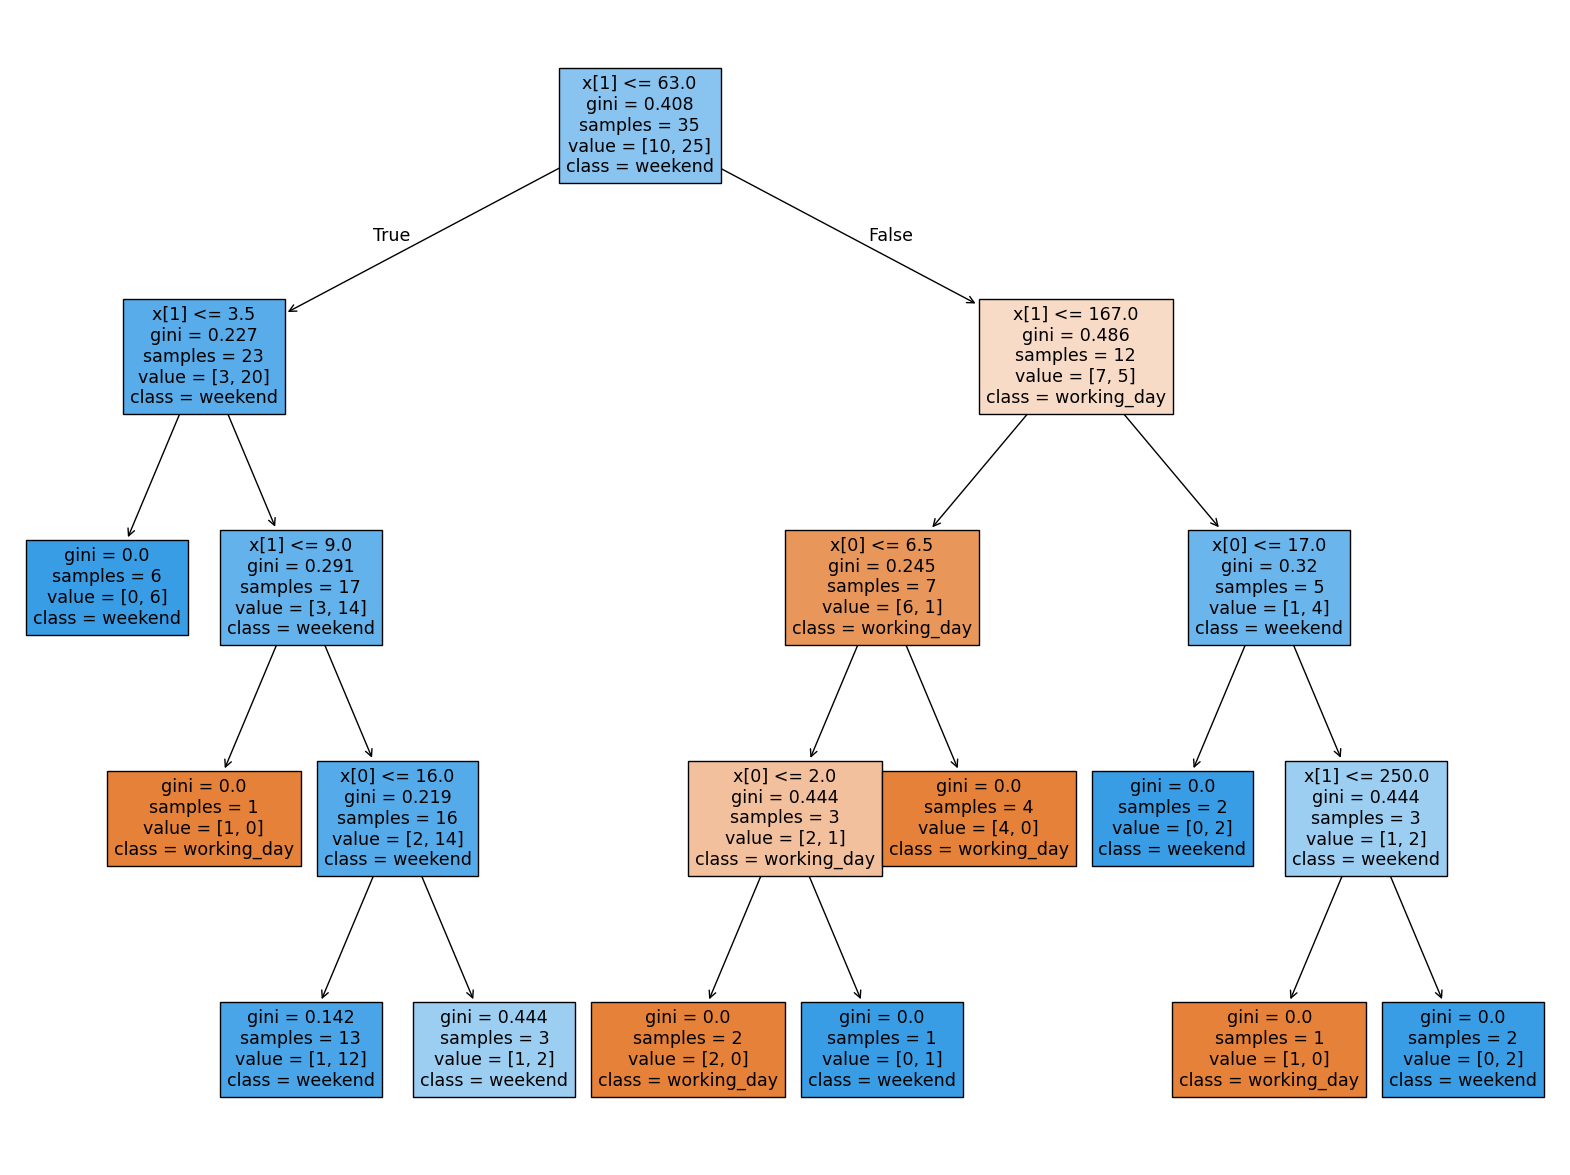

In [27]:
fig, ax = plt.subplots(figsize=(20, 15))

plot_tree(dtc_4,
          class_names=['working_day', 'weekend'],
          filled=True, ax=ax)
plt.show()